## Book Recommendation System (Beginner Level)

### Goal
The aim of this project is to build a **beginner-friendly recommendation system** using the **Goodbooks-10k dataset**.  
We will explore simple approaches like **popularity-based recommendations** and move towards **collaborative filtering**, while also enriching results with book metadata (titles, authors, covers).

### Dataset
The dataset contains:
- `ratings.xlsx` → User–book ratings  
- `books.xlsx` → Book details (title, authors, image URLs)  
- Other files (tags, to_read, etc.) for future extensions  

### Approach
1. **Data Exploration** – Understand the structure of books & ratings.  
2. **Popularity Recommender** – Recommend books based on number of ratings.  
3. **Collaborative Filtering** – Suggest similar books using user–item interactions.  
4. **Enriched Output** – Display recommendations with title, author, and cover image.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
ROOT = os.path.abspath(os.path.join(os.getcwd(),'..'))
data_dir = os.path.join(ROOT,'data')
print(os.listdir(data_dir))

# Ratings file path
ratings_path = os.path.join(data_dir,'ratings.csv')

# Loading Ratings file
df_ratings = pd.read_csv(ratings_path)

# Books file path
books_path = os.path.join(data_dir,'books.csv')

# Books Ratings file
df_books = pd.read_csv(books_path)


['books.csv', 'book_tags.csv', 'ratings.csv', 'sample_book.xml', 'tags.csv', 'to_read.csv']


#### Sanity Checks

In [3]:
 # Basic shape and columns

print(f"Ratings: ", df_ratings.shape, list(df_ratings.columns))
print(f'Books: ', df_books.shape ,list(df_books.columns))

Ratings:  (981756, 3) ['book_id', 'user_id', 'rating']
Books:  (10000, 23) ['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']


In [4]:
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
# Check dtypes
print(df_ratings.dtypes)
print('------------------------------------------')
print(df_books.dtypes)

book_id    int64
user_id    int64
rating     int64
dtype: object
------------------------------------------
id                             int64
book_id                        int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object


In [7]:
df_books.isnull().sum()

id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [8]:
df_ratings.isnull().sum()

book_id    0
user_id    0
rating     0
dtype: int64

In [9]:
print(f"Duplicate rows in ratings:", df_ratings.duplicated().sum() )

Duplicate rows in ratings: 1644


In [10]:
print(f"Duplicate rows in books:", df_books.duplicated().sum() )

Duplicate rows in books: 0


#### Data cleaning and Pre processing

In [11]:
# Drop identifier cols
df_books.drop(columns=['isbn','isbn13'], inplace=True)

# Fill missing values properly
df_books['original_title'] = df_books['original_title'].fillna(df_books['title'])
df_books['language_code'] = df_books['language_code'].fillna('unknown')

# Drop rows where original_title or year is missing
df_books.dropna(subset=['original_title','original_publication_year'], inplace=True)


In [12]:
df_books.isnull().sum()

id                           0
book_id                      0
best_book_id                 0
work_id                      0
books_count                  0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64

In [13]:
# Drop duplicated rows in books
print('Duplicated rows of books before drop', df_books.duplicated().sum())
df_books = df_books.drop_duplicates()
print('Duplicated rows of books after drop', df_books.duplicated().sum())

Duplicated rows of books before drop 0
Duplicated rows of books after drop 0


In [14]:
# Drop duplicated rows in ratings
print('Duplicated rows of ratings before drop', df_books.duplicated().sum())
df_ratings = df_ratings.drop_duplicates()
print('Duplicated rows of ratings after drop', df_books.duplicated().sum())

Duplicated rows of ratings before drop 0
Duplicated rows of ratings after drop 0


### Rremove users and books with few ratings

In recommendation systems, very sparse data adds noise and reduces the quality of recommendations.

- **Users with very few ratings**  
  - Example: a user who rated only 1 book.  
  - We cannot learn their preferences or find meaningful similarity with other users.  
  - These are considered *cold-start users* and are typically removed from training.

- **Books with very few ratings**  
  - Example: a book with just 1 or 2 ratings.  
  - A single opinion cannot reliably represent the book’s quality.  
  - Such items provide little to no signal for collaborative filtering.

#### Trade-off
- **Pros:** Better model performance, less noise, more reliable similarity computation.  
- **Cons:** Some data is lost, but this is usually a small fraction.  

Common practice:  
- Keep users with at least **3 ratings**.  
- Keep books with at least **5 ratings**.


In [15]:
# Ensure consistent dtypes
df_ratings['user_id'] = df_ratings['user_id'].astype(int)
df_ratings['book_id'] = df_ratings['book_id'].astype(int)


# Filter books
book_counts = df_ratings['book_id'].value_counts()
df_ratings = df_ratings[df_ratings['book_id'].isin(book_counts[book_counts >= 5].index)]

# Filter users
user_counts = df_ratings['user_id'].value_counts()
df_ratings = df_ratings[df_ratings['user_id'].isin(user_counts[user_counts >= 3].index)]


In [16]:
# Master data frame
df = df_ratings.merge(
    df_books[['book_id','title','authors','average_rating','ratings_count']],
    on='book_id',
    how='inner'
)
df.head(3)

,book_id,user_id,rating,title,authors,average_rating,ratings_count
0,1,314,5,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54,1678823
1,1,439,3,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54,1678823
2,1,588,5,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.54,1678823


### Exploratory Data Analysis (EDA)

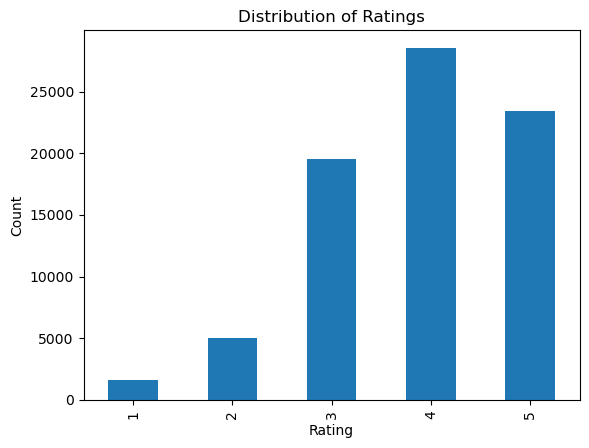

In [17]:
import matplotlib.pyplot as plt

df['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()


In [18]:
# Top rated books
top_books = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print(top_books)


title
Pearls of Lutra (Redwall, #9)                                      100
Redwall (Redwall, #1)                                              100
Pygmalion & My Fair Lady                                           100
Quicksilver (The Baroque Cycle, #1)                                100
Them: Adventures with Extremists                                   100
The Zahir                                                          100
Raise High the Roof Beam, Carpenters & Seymour: An Introduction    100
Red Prophet (Tales of Alvin Maker, #2)                             100
Regeneration (Regeneration, #1)                                    100
Sex and the City                                                   100
Name: rating, dtype: int64


In [19]:
n_users = df['user_id'].nunique()
n_books = df['book_id'].nunique()
n_ratings = len(df)

sparsity = 1 - (n_ratings / (n_users * n_books))
print(f"Users: {n_users}, Books: {n_books}, Ratings: {n_ratings}")
print(f"Sparsity of user-book matrix: {sparsity:.4f}")


Users: 27633, Books: 811, Ratings: 78164
Sparsity of user-book matrix: 0.9965


#### Baseline: Popularity-based Recommendations

In [20]:
# Aggregate rating by book
popularity_df = (
    df.groupby(['book_id','title', 'authors'])
    .agg(avg_rating = ('rating','mean'),
    num_ratings = ('rating','count'))
.reset_index()
)

# Only keep books with at least 50 ratings (threshold to remove obscure books)
popularity_df = popularity_df[popularity_df['num_ratings'] >= 50]

# Sort by avg rating first, then by number of ratings

popularity_df = popularity_df.sort_values(
    by=['avg_rating','num_ratings'],
    ascending=[False,False]
).head(10)


print("Top 10 Books Recommendation")
(popularity_df
 .reset_index(drop=True)
 [['book_id','title','authors','avg_rating','num_ratings']]
 .head(10))

Top 10 Books Recommendation


,book_id,title,authors,avg_rating,num_ratings
0,9566,Still Life with Woodpecker,Tom Robbins,4.777778,99
1,4708,The Beautiful and Damned,F. Scott Fitzgerald,4.660000,100
2,9569,Villa Incognito,Tom Robbins,4.620690,87
3,3885,The Taste of Home Cookbook,"Janet Briggs, Beth Wittlinger",4.550000,100
4,2767,A People's History of the United States,Howard Zinn,4.540000,100
5,2865,Girl with a Pearl Earring,Tracy Chevalier,4.530000,100
6,5344,Hard Times,Charles Dickens,4.526316,95
7,6862,Amsterdam,Ian McEwan,4.516129,93
8,976,Deception Point,Dan Brown,4.500000,100
9,9531,Peter and the Shadow Thieves (Peter and the St...,"Dave Barry, Ridley Pearson, Greg Call",4.491525,59


### Baseline Model: Popularity-Based Recommender

As a starting point, we implemented a **popularity-based recommendation system**.  
This approach does not personalize suggestions — instead, it recommends the books that are most widely liked by everyone.

**Steps performed:**
1. **Grouped ratings by book** → combined all user ratings for each book.
2. **Computed aggregates** → calculated the average rating (`avg_rating`) and the number of ratings (`num_ratings`) per book.
3. **Filtered out obscure books** → kept only books with at least **50 ratings**, to avoid bias from very few reviews.
4. **Sorted & selected top 10** → ranked by highest average rating, breaking ties with number of ratings.

**Output:**  
A list of the **Top 10 most popular books** (based on community ratings), which serves as our **baseline recommender**.  
This provides a benchmark against which we can compare more advanced, personalized recommendation models.


## User–User Collaborative Filtering (UCF)

**Goal:** Personalize recommendations by finding users who rate books like you do, then suggesting books they enjoyed that you haven’t read.

### Intuition
- If two users rate many of the same books similarly, they’re **neighbors**.
- Recommend to user *u* the books that *u*’s neighbors rated highly.

### Data Setup
- Build a **user–item matrix** `R` with rows = `user_id`, columns = `book_id`, values = `rating`.
- Very sparse in practice (most cells empty).

### Similarity Between Users
Common choices:
- **Cosine similarity** on rating vectors:  
  $$
  \text{sim}(u,v) = \frac{R_u \cdot R_v}{\|R_u\| \, \|R_v\|}
  $$
- **Pearson correlation** (mean-centered; reduces user bias).

> Tip: Compute similarity using **only co-rated items** (books both users rated).

### Scoring & Ranking (for a target user *u*)
1. Find top-`k` **most similar users** to *u* (neighbors), optionally require at least `m` co-rated items.
2. For each candidate book *i* not rated by *u*, predict a score:
   - **Weighted average (cosine):**  
     $$
     \hat{r}_{u,i} = \frac{\sum_{v \in N_k(u)} \text{sim}(u,v)\, r_{v,i}}{\sum_{v \in N_k(u)} |\text{sim}(u,v)|}
     $$
   - **Mean-centered (Pearson):**  
     $$
     \hat{r}_{u,i} = \bar r_u + \frac{\sum_{v \in N_k(u)} \text{sim}(u,v)\,(r_{v,i}-\bar r_v)}{\sum_{v \in N_k(u)} |\text{sim}(u,v)|}
     $$
3. Rank candidate books by $\hat{r}_{u,i}$ and return top-`N`.

### Practical Settings
- `k` (neighbors): 10–100 (tune).
- Similarity: cosine (simple) or Pearson (handles user bias).
- **Min co-ratings**: e.g., ≥5 shared books to trust similarity.
- Optional **shrinkage** to down-weight similarities from few overlaps.
- Handle ties deterministically (e.g., break by `ratings_count`).

### Evaluation
- Split by user history (time-aware if possible).
- **Rating prediction:** RMSE / MAE.  
- **Top-N quality:** Precision@K, Recall@K, MAP@K, NDCG@K.

**Pos**
- Simple, interpretable, no heavy training.
- Works well with dense neighborhoods.  

**Cons**
-  Struggles with **cold-start** users/items and extreme sparsity.
-  Similarity computation can be heavy at scale (optimize with sparse ops/ANN).

---
**Next:** build the user–item matrix, compute user–user similarity, and write a `recommend_books_user(user_id, N)` function.


In [21]:
# Create user-book rating matrix (Sparse  matrices)

user_book_matrix = df.pivot_table(
    index='user_id',
    columns='book_id',
    values='rating'
)

print("Shape of user_book matrix", user_book_matrix.shape)
user_book_matrix.head(3)

Shape of user_book matrix (27633, 811)


book_id,1,2,3,5,6,8,10,11,13,21,...,9854,9864,9865,9912,9913,9914,9915,9943,9957,9998
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Right now the user–book matrix has a lot of NaN (because most users haven’t rated most books).
>We need to replace those with 0 so scikit-learn can calculate cosine similarity.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Fill missing ratings with 0
user_book_matrix_filled = user_book_matrix.fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_book_matrix_filled)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_book_matrix.index,
    columns=user_book_matrix.index
)


print("User–User similarity matrix shape:", user_similarity_df.shape)
user_similarity_df.head(3)

User–User similarity matrix shape: (27633, 27633)


user_id,2,4,7,9,10,11,14,19,20,22,...,53400,53401,53403,53404,53406,53409,53419,53420,53422,53424
user_id,,,,,,,,,,,,,,,,,,,,,
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get Top-K Similar Users

- Now that we have user_similarity_df (a full user–user similarity matrix), we can write a helper function to fetch the nearest neighbors of a given user.

In [23]:
def get_top_k_similar_users(user_id,k=5):

    # Similarities of target user with everyone
    sims = user_similarity_df[user_id].sort_values(ascending= False)

    # Drop self(similarity themselves = 1)
    sims = sims.drop(user_id)

    # return top k
    return sims.head(k)


In [24]:

print("Top 5 users similar to user 9254:")
print(get_top_k_similar_users(user_id=9254, k=5))

Top 5 users similar to user 9254:
user_id
12039    0.857493
14105    0.857493
28800    0.857493
32502    0.857493
51145    0.857493
Name: 9254, dtype: float64


In [25]:
def recommend_books_user(user_id, n=5, k=5):
    """
    Recommend books for a target user using top-k similar users.
    """
    # 1. Get top-k similar users
    similar_users = get_top_k_similar_users(user_id, k).index
    
    # 2. Books already read by target user
    user_books = set(df[df['user_id'] == user_id]['book_id'])
    
    # 3. Candidate books = books from similar users
    candidate_books = df[df['user_id'].isin(similar_users)]
    candidate_books = candidate_books[~candidate_books['book_id'].isin(user_books)]
    
    # 4. Rank by avg rating among similar users
    top_recs = (
        candidate_books.groupby(['book_id','title','authors'])
        .agg(avg_rating=('rating','mean'),
             num_ratings=('rating','count'))
        .sort_values(['avg_rating','num_ratings'], ascending=[False,False])
        .head(n)
    )
    
    return top_recs.reset_index()


In [26]:
print("Recommended books for user 9314:")
print(recommend_books_user(user_id=9314, n=5, k=5)['title'])


Recommended books for user 9314:
0               Ethan Frome
1             All the Names
2    The Emperor's Children
3                Fight Club
4     Ten Apples Up On Top!
Name: title, dtype: object


----
### Model-based collaborative filtering

In [27]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split


# Define rating scale (Goodreads ratings: 1–5)
reader = Reader(rating_scale=(1, 5))

# Load from our df (only need user_id, book_id, rating)
data = Dataset.load_from_df(df[['user_id', 'book_id', 'rating']], reader)


# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize SVD model
svd_model = SVD()

# Train on training data
svd_model.fit(trainset)

# Evaluate on test data
predictions = svd_model.test(testset)

# Quick evaluation: RMSE & MAE
from surprise import accuracy
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))


RMSE: 0.9117
RMSE: 0.9117279034994584
MAE:  0.7295
MAE: 0.7295255401813636


In [28]:
# Example: predict rating of user 314 for book 1
pred = svd_model.predict(uid=9314, iid=1)
print(pred)

user: 9314       item: 1          r_ui = None   est = 4.29   {'was_impossible': False}


In [29]:
def recommend_books_svd(user_id, n=5):
    # All unique book IDs
    all_books = df['book_id'].unique()
    
    # Books the user already read
    read_books = set(df[df['user_id'] == user_id]['book_id'])
    
    # Candidate books = all minus read
    candidate_books = [b for b in all_books if b not in read_books]
    
    # Predict ratings for candidate books
    predictions = [svd_model.predict(user_id, book) for book in candidate_books]
    
    # Sort by estimated rating
    top_preds = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    
    # Map back to book titles
    top_recs = df[df['book_id'].isin([p.iid for p in top_preds])][['book_id','title','authors']].drop_duplicates()
    
    return top_recs


In [31]:
print("Recommended books for user 9314 (SVD):")
print(recommend_books_svd(user_id=9314, n=5)['title'])


Recommended books for user 9314 (SVD):
35121       The Beautiful and Damned
74522     Still Life with Woodpecker
74710                Villa Incognito
75961    Love in the Time of Cholera
77908            The Atonement Child
Name: title, dtype: object
